In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd "/content/drive/MyDrive/Selection-of-criminals_with_syndata/CTGAN_syndata_generaton" 

/content/drive/MyDrive/Selection-of-criminals_with_syndata/CTGAN_syndata_generaton


In [3]:
!pip install sdmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 7.4 MB/s eta 0:00:00


## 2. Review Similarity of the Generated Data (Heat Map)

- A heatmap is usually used to visualize the relationship between two or more variables from a dataset, such as the correlation between two different features.
- Through this, we can easily visualize data patterns and trends such as high or low correlation between different variables.
- A heatmap can quickly emphasize insights and relationships in a complex dataset, which is important. This means that heatmaps are used often for data analysis and visualization.
- We can quickly check the correlation between different variables for each original data and synthetic data through heatmap analysis.
- This is the reason we kept the same column order for the original data and synthetic data in the previous exercise.

### Load Libaries
- Import libraries

In [4]:
import pandas as pd
import copy
import time
import numpy as np

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt 

# Using font_manager object of matplotlib, set the font of the heatmap that we are going to display.
import matplotlib.font_manager as fm

# Use a default font provided by Google Colab called DejaVu Sans.
plt.rcParams['font.family'] = 'DejaVu Sans'

# Function for setting the font. Configures the font size and the path of the installed font.
def set_font():
    font_path = '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/'
    fontprop = fm.FontProperties(fname=font_path, size=12)
    return fontprop

fontprop = set_font()

In [6]:
#Jupiter Cell Full Screen View
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# useful for debuging (print the results of formulas and functions entered in the cells of Jupyter)
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
# Each column width at maximum (print all column contents)
pd.set_option('display.max_colwidth', -1)
# Show up to 500 rows
pd.set_option('display.max_rows', 500)
# Display up to 500 columns
pd.set_option('display.max_columns', 500)
# Total length of data frame
pd.set_option('display.width', 1000)

print('ready to run')
# logging starttime 
startTime = time.time()

ready to run


 ### Load Data

- Execute copy in the configured path after loading original data and synthetic data.

In [7]:
df_syn_01 = pd.read_csv('./data_sample/df_syn_en_14.csv', encoding='utf-8-sig') #New synthetic data

In [8]:
df_syn_base = pd.read_csv('df_syn_en.csv', encoding='utf-8-sig') #Existing synthetic data

In [9]:
copy_syn = copy.deepcopy(df_syn_01)

In [10]:
copy_base = copy.deepcopy(df_syn_base)

#### Check Data
- Check the loaded original and synthetic data.

In [11]:
copy_syn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dec_custom_code         1600 non-null   int64  
 1   imp_dec_code            1600 non-null   object 
 2   imp_trd_code            1600 non-null   int64  
 3   imp_typ_code            1600 non-null   int64  
 4   collect_code            1600 non-null   int64  
 5   typ_transport_code      1600 non-null   int64  
 6   dec_mark                1600 non-null   object 
 7   importer                1600 non-null   object 
 8   ovs_cust_code           1449 non-null   object 
 9   exps_carr_code          473 non-null    object 
 10  HS10                    1600 non-null   int64  
 11  country_ship_code       1600 non-null   object 
 12  country_orig_code       1600 non-null   object 
 13  trff_rate               1600 non-null   float64
 14  trff_class_code         1600 non-null   

In [12]:
copy_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dec_num                 54000 non-null  int64  
 1   dec_date                54000 non-null  object 
 2   dec_custom_code         54000 non-null  int64  
 3   imp_dec_code            54000 non-null  object 
 4   imp_trd_code            54000 non-null  int64  
 5   imp_typ_code            54000 non-null  int64  
 6   collect_code            54000 non-null  int64  
 7   typ_transport_code      54000 non-null  int64  
 8   dec_mark                54000 non-null  object 
 9   importer                54000 non-null  object 
 10  ovs_cust_code           48799 non-null  object 
 11  exps_carr_code          9538 non-null   object 
 12  HS10                    54000 non-null  int64  
 13  country_ship_code       54000 non-null  object 
 14  country_orig_code       54000 non-null

- Delete 'dec_num' and 'dec_date' from original data copy for correlation comparison.

In [13]:
copy_base = copy_base.drop(['dec_num','dec_date'],axis = 1)

- Confirm successful deletion.

In [14]:
copy_base.shape

(54000, 20)

## Labeling Data

- In order to convert all category data to numeric data for both original data and synthetic data, perform label encoding.

### Labeling Base Data (Heatmap 1)

In [1]:
# Label encoding (change category data to numeric data)
encoder = LabelEncoder()

# Find the correlation between the transformed numeric data
for column_name,item in copy_base.iteritems(): 
    encoder.fit(item)
    labels = encoder.transform(item)
    copy_base[column_name] = labels

NameError: name 'LabelEncoder' is not defined

- We can see in the previous step that 'imp_dec_code' column has data values that is too biased.
- Since we cannot get appropriate data during sampling, we delete the column.

In [16]:
copy_base = copy_base.drop('imp_dec_code',axis=1)

In [17]:
corr = copy_base.corr()

### Labeling Generated Synthetic Data (Heatmap 2)

- Also perform label encoding on the synthetic data.

In [18]:
# Label encoding (change category data to numeric data)
encoder = LabelEncoder()

# Find the correlation between the transformed numeric data
for column_name,item in copy_syn.iteritems(): # Encode the dataframe data to numerical form 
    encoder.fit(item)
    labels = encoder.transform(item)
    copy_syn[column_name] = labels

- 'imp_dec_code' column data value is too biased also for synthetic data.
- We again delete the column since we cannot get appropriate data during sampling.

In [19]:
copy_syn = copy_syn.drop('imp_dec_code',axis=1)

In [20]:
corr2 = copy_syn.corr()

### Create and compare heat maps

- We visualize as heatmap and compare for both original and synthetic data.
- For heatmaps, we can consider high absolute correlation value as strong correlation.
- The darker squares are shown in similar positions for both heatmap.
- We can see visually the similarity between the synthetic data and original data.

Text(0.5, 1.0, 'bass data heat map')

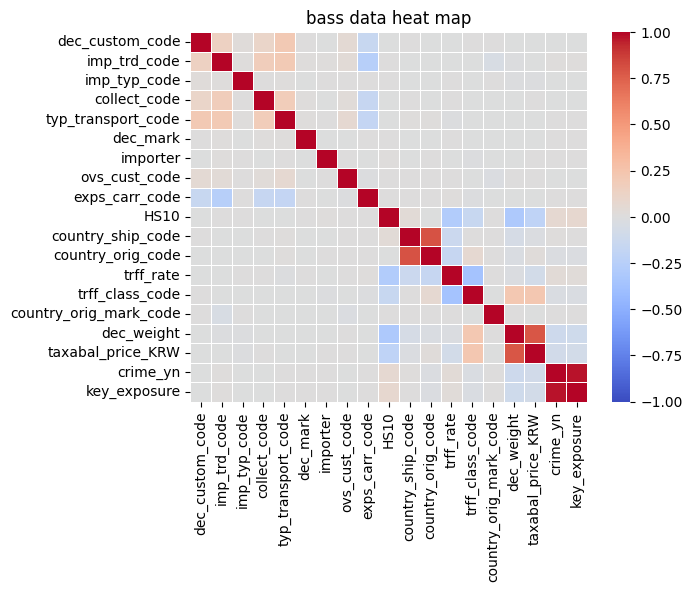

In [21]:
sns.heatmap(corr, cmap='coolwarm', linewidths =0.5, annot_kws={'size':10, 'fontproperties':fontprop}, vmin=-1.0)
plt.title('bass data heat map')

Text(0.5, 1.0, 'syn data heat map')

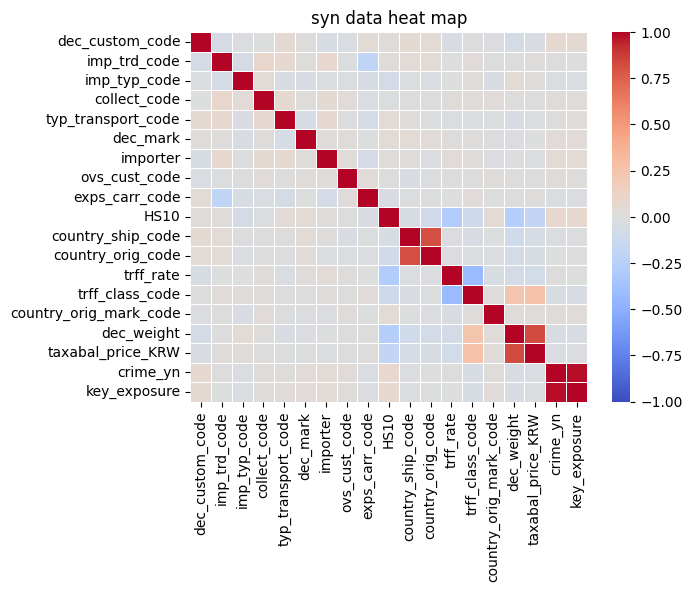

In [22]:
sns.heatmap(corr2, cmap='coolwarm', linewidths =0.5, annot_kws={'size':10, 'fontproperties':fontprop},vmin=-1.0)
plt.title('syn data heat map')